Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

Non-Evidence       1.00      1.00      1.00      3632
    Evidence       1.00      1.00      1.00      8368

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



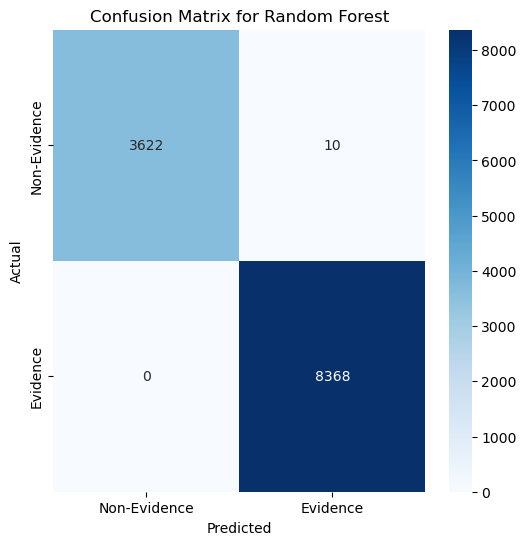

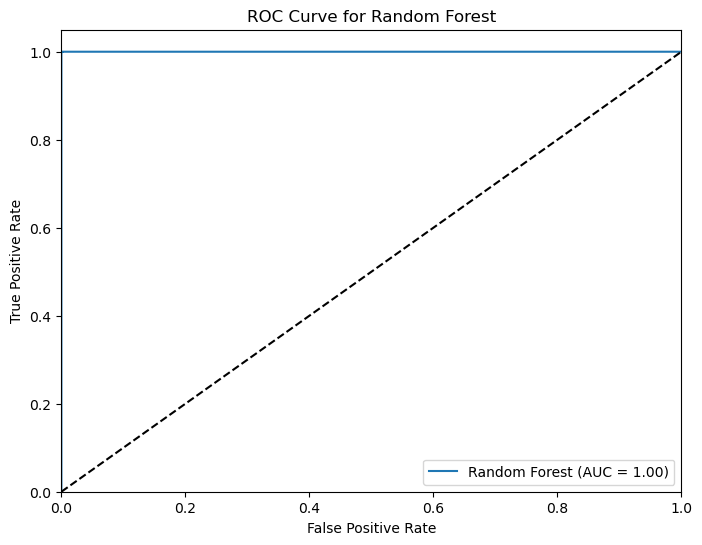

Training and evaluating SVM...

Classification Report for SVM:
              precision    recall  f1-score   support

Non-Evidence       1.00      0.97      0.98      3632
    Evidence       0.99      1.00      0.99      8368

    accuracy                           0.99     12000
   macro avg       0.99      0.98      0.99     12000
weighted avg       0.99      0.99      0.99     12000



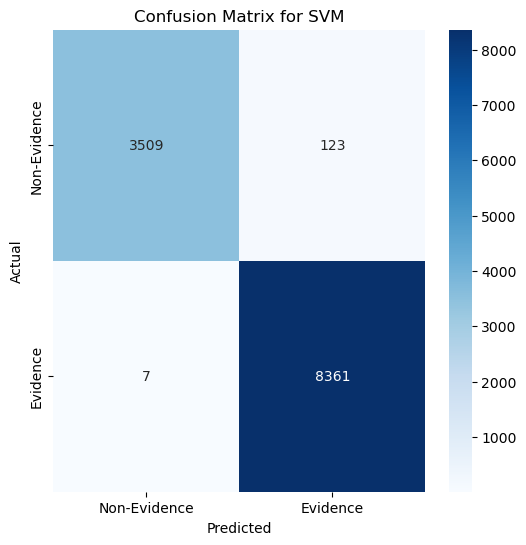

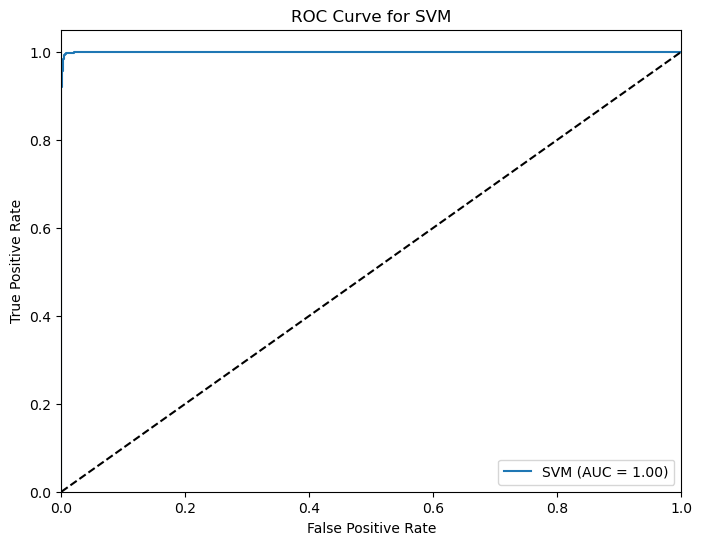

Training and evaluating ANN...

Classification Report for ANN:
              precision    recall  f1-score   support

Non-Evidence       1.00      1.00      1.00      3632
    Evidence       1.00      1.00      1.00      8368

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



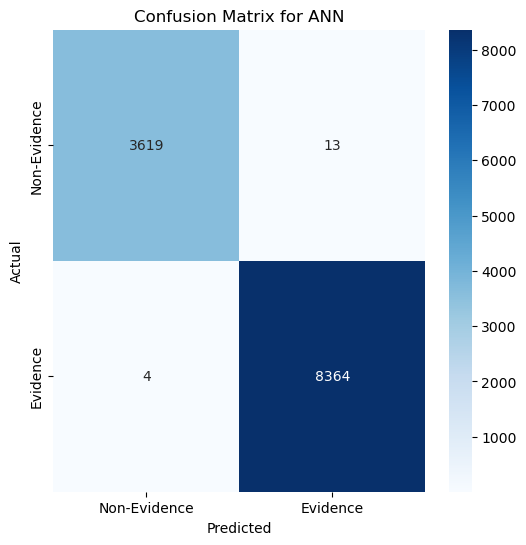

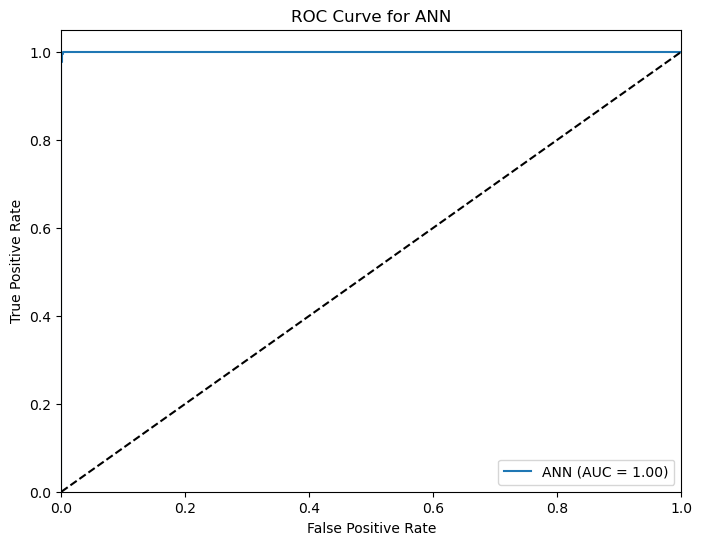

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:/Users/CSE/Desktop/Data/Forensic/synthetic_email_forensics_dataset_with_noise.csv")  # Adjust path as needed

# Preprocessing
# Encode categorical features (Sender, Recipient, Subject, Metadata)
label_encoder = LabelEncoder()
data['Sender'] = label_encoder.fit_transform(data['Sender'])
data['Recipient'] = label_encoder.fit_transform(data['Recipient'])
data['Subject'] = label_encoder.fit_transform(data['Subject'])
data['Metadata'] = label_encoder.fit_transform(data['Metadata'])

# Convert Body Content to numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=50)  # Limit to 100 features for simplicity
body_counts = vectorizer.fit_transform(data['Body Content']).toarray()

# Combine CountVectorizer features with other numerical features
X = np.hstack((data[['Sender', 'Recipient', 'Subject', 'Metadata']].values, body_counts))
y = data['Label']

# Encode the target variable (Label) if it’s not already numerical
y = label_encoder.fit_transform(y)  # Converts "Evidence" and "Non-Evidence" to 0 and 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with minimal parameters
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),  # Default n_estimators=100
    "SVM": SVC(probability=True, random_state=42),             # Default kernel='rbf'
    "ANN": MLPClassifier(random_state=42)                      # Default hidden_layer_sizes=(100,)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f"Training and evaluating {name}...")
    
    # Train the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test_scaled)
    y_prob = clf.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class
    
    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=["Non-Evidence", "Evidence"]))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Evidence", "Evidence"], yticklabels=["Non-Evidence", "Evidence"])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()